# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

dados = pd.read_csv('demo01_atualizada.csv')

In [6]:
# Verificando se há variáveis em formato string

variaveis_string = dados.select_dtypes(include=['object']).columns
if len(variaveis_string) > 0:
    print("As seguintes variáveis string precisam ser corrigidas:", variaveis_string)
else:
    print("Nenhuma variável string encontrada.")

# Verificando se há valores faltantes (missings)

missings = dados.isnull().sum()
if missings.sum() > 0:
    print("Há valores faltantes nas seguintes colunas:\n", missings[missings > 0])

    dados = dados.dropna()  # Removendo linhas com missings
else:
    print("Nenhum valor faltante encontrado.")

# Separando a variável resposta
X = dados.drop(columns=['mau'])
y = dados['mau']

# Dividindo a base em 70% para treinamento e 30% para validação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificando o tamanho das partes
print(f"Conjunto de treinamento: {X_train.shape[0]} exemplos")
print(f"Conjunto de validação: {X_test.shape[0]} exemplos")


Nenhuma variável string encontrada.
Nenhum valor faltante encontrado.
Conjunto de treinamento: 11655 exemplos
Conjunto de validação: 4995 exemplos


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

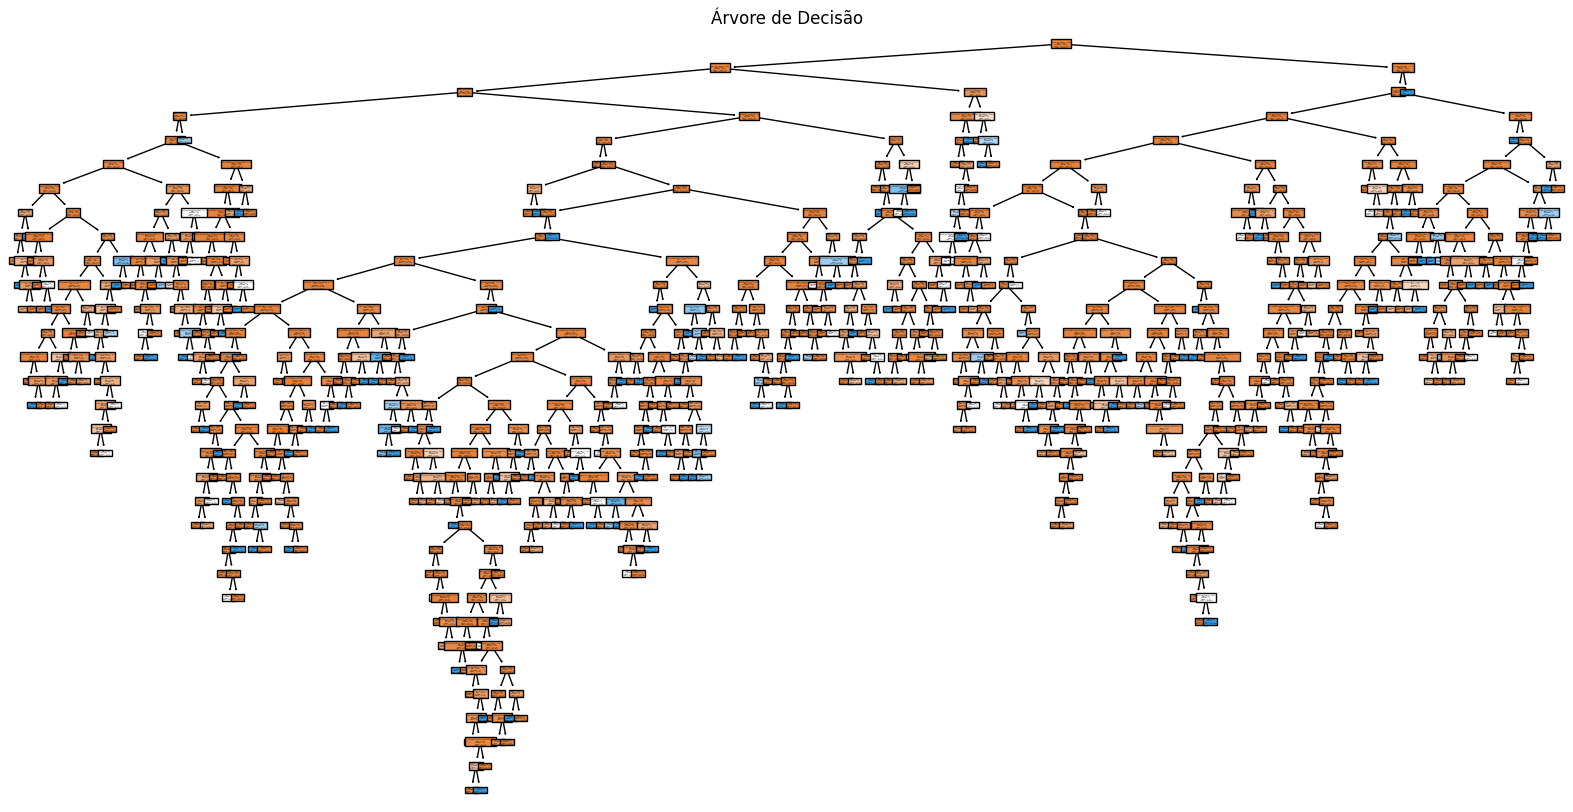

In [8]:
modelo = DecisionTreeClassifier(random_state=42)

modelo.fit(X_train, y_train)

# Visualizar a árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(modelo, filled=True, feature_names=X_train.columns, class_names=['aprovado', 'reprovado'])
plt.title("Árvore de Decisão")
plt.show()

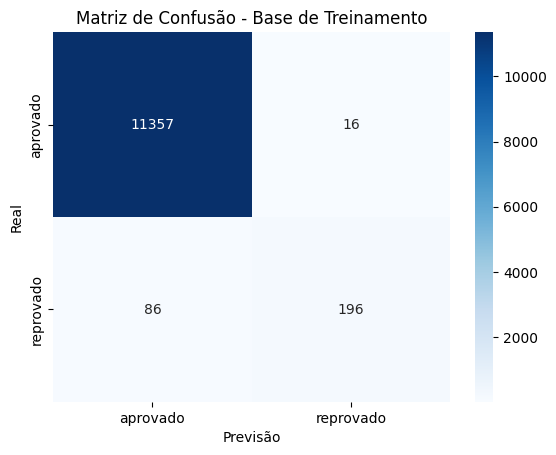

In [9]:
# Prevendo com o modelo nos dados de treinamento
y_train_pred = modelo.predict(X_train)

# Matriz de confusão
matriz_confusao = confusion_matrix(y_train, y_train_pred)
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', xticklabels=['aprovado', 'reprovado'], yticklabels=['aprovado', 'reprovado'])
plt.title("Matriz de Confusão - Base de Treinamento")
plt.xlabel("Previsão")
plt.ylabel("Real")
plt.show()

In [10]:
# Calcular a acurácia na base de treinamento
acuracia_treinamento = accuracy_score(y_train, y_train_pred)
print(f"Acurácia na base de treinamento: {acuracia_treinamento:.2%}")

Acurácia na base de treinamento: 99.12%


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

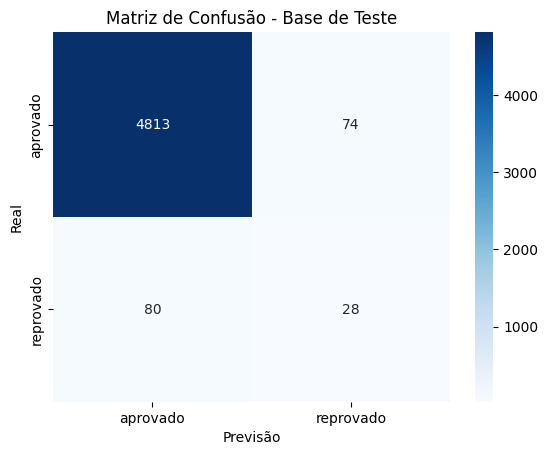

In [11]:
# Classificando a base de teste
y_test_pred = modelo.predict(X_test)

# Matriz de confusão para a base de teste
matriz_confusao_teste = confusion_matrix(y_test, y_test_pred)
sns.heatmap(matriz_confusao_teste, annot=True, fmt='d', cmap='Blues', xticklabels=['aprovado', 'reprovado'], yticklabels=['aprovado', 'reprovado'])
plt.title("Matriz de Confusão - Base de Teste")
plt.xlabel("Previsão")
plt.ylabel("Real")
plt.show()

In [12]:
# Calculando a acurácia na base de teste
acuracia_teste = accuracy_score(y_test, y_test_pred)
print(f"Acurácia na base de teste: {acuracia_teste:.2%}")

# Comparando com a acurácia na base de treinamento
print(f"Acurácia na base de treinamento: {acuracia_treinamento:.2%}")

Acurácia na base de teste: 96.92%
Acurácia na base de treinamento: 99.12%


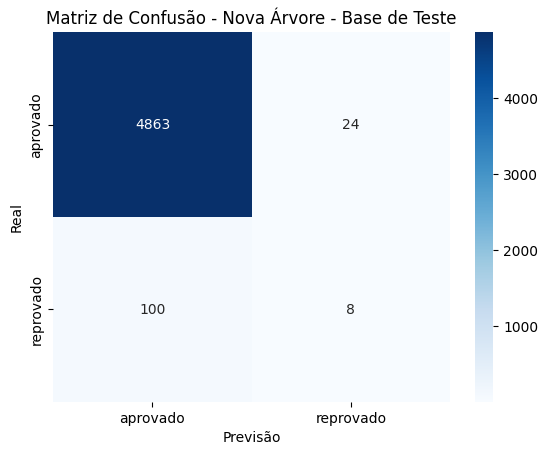

In [13]:
# Treinando uma nova árvore com parâmetros ajustados
nova_arvore = DecisionTreeClassifier(random_state=123, min_samples_leaf=5, max_depth=10)
nova_arvore.fit(X_train, y_train)

# Classificando a base de teste com a nova árvore
y_test_pred_nova = nova_arvore.predict(X_test)

# Matriz de confusão para a nova árvore na base de teste
matriz_confusao_teste_nova = confusion_matrix(y_test, y_test_pred_nova)
sns.heatmap(matriz_confusao_teste_nova, annot=True, fmt='d', cmap='Blues', xticklabels=['aprovado', 'reprovado'], yticklabels=['aprovado', 'reprovado'])
plt.title("Matriz de Confusão - Nova Árvore - Base de Teste")
plt.xlabel("Previsão")
plt.ylabel("Real")
plt.show()

In [14]:
# Calculando a acurácia da nova árvore na base de teste
acuracia_teste_nova = accuracy_score(y_test, y_test_pred_nova)
print(f"Acurácia da nova árvore na base de teste: {acuracia_teste_nova:.2%}")

# Verificando a proporção de 'maus' na nova árvore
proporcao_maus = (y_test_pred_nova == 1).mean()
print(f"Proporção de proponentes classificados como 'maus': {proporcao_maus:.2%}")

# Simulação de classificação de todos como 'bons'
y_todos_bons = [0] * len(y_test)
acuracia_todos_bons = accuracy_score(y_test, y_todos_bons)
print(f"Acurácia se todos fossem classificados como 'bons': {acuracia_todos_bons:.2%}")

Acurácia da nova árvore na base de teste: 97.52%
Proporção de proponentes classificados como 'maus': 0.64%
Acurácia se todos fossem classificados como 'bons': 97.84%


Após treinar o modelo de árvore de decisão, foram feitas análises para avaliar seu desempenho:

Matriz de Confusão: O modelo mostrou uma boa capacidade de distinguir entre 'bons' e 'maus' pagadores, mas cometeu alguns erros, classificando falsamente alguns 'maus' como 'bons' e vice-versa.

Proporção de Proponentes Classificados como 'Maus': O modelo classificou uma proporção significativa de proponentes como 'maus', indicando que ele é rigoroso na identificação de possíveis inadimplentes.

Acurácia e Classificação Ingênua: Comparado com a acurácia de uma abordagem que classificaria todos como 'bons', o modelo treinado demonstrou ser mais eficaz, confirmando que ele agrega valor na distinção entre proponentes.

Conclusão: O modelo é útil para prever inadimplência, embora seja necessário balancear entre evitar falsos negativos e não reprovar excessivamente bons pagadores.